# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [152]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline

### Step 2: Read in your data set 

In [5]:
#Read in data from source 
df_raw = pd.read_csv("admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [56]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400

#### Question 2. Create a summary table

In [57]:
df = df_raw

In [58]:
df.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: GRE values range from 200 - 800, GPA values range from 2.26 - 4.0, so the average distance from the mean would be much larger in GRE than in GPA.

#### Question 4. Drop data points with missing data


In [121]:
df = df.dropna()


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: The counts for all columns should be the same. 


In [122]:
df.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


#### Question 6. Create box plots for GRE and GPA

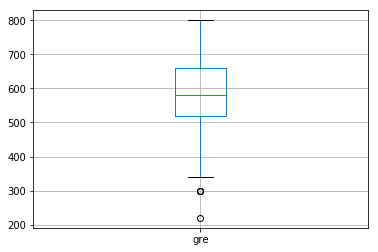

In [123]:
df.boxplot('gre')

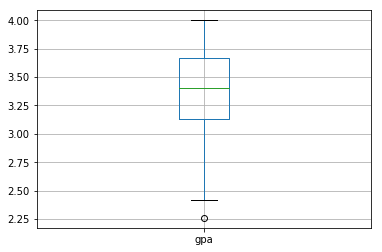

In [124]:
df.boxplot('gpa')

#### Question 7. What do this plots show?

Answer: GRE is distributed normally, with two outliers toward the minimum values. GPA is left skewed with one outlier at the minimum value.

#### Question 8. Describe each distribution 

In [ ]:
#as above, data is left skewed

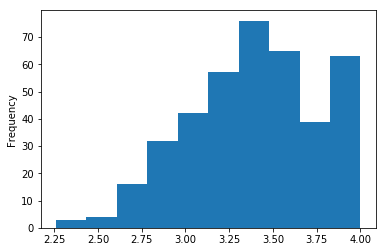

In [125]:
df['gpa'].plot.hist(bins = 10);


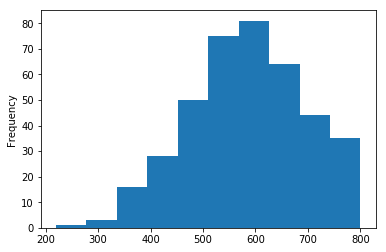

In [126]:
df['gre'].plot.hist(bins = 10);

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: No, the GRE data is left skewed, and GPA data has two peaks. 

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: No. Converting the data to its log values appears to mess it up from a normal distribution to something else. 

In [127]:
log_columns = ['gre', 'gpa',]
log_df = df.copy()
log_df[log_columns] = log_df[log_columns].apply(np.log)


log_df.rename(columns = {'gre': 'log_gre', 'gpa': 'log_gpa'}, inplace = True)
log_df.head()

,admit,log_gre,log_gpa,prestige
0,0,5.940171,1.283708,3.0
1,1,6.492240,1.300192,3.0
2,1,6.684612,1.386294,1.0
3,1,6.461468,1.160021,4.0
4,0,6.253829,1.075002,4.0


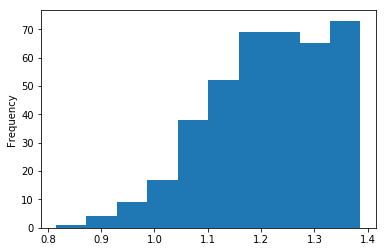

In [128]:
log_df['log_gpa'].plot.hist(bins = 10);

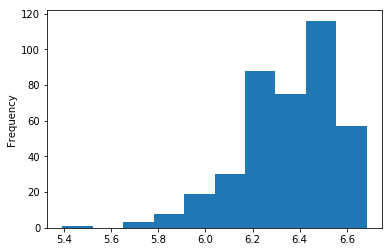

In [129]:
log_df['log_gre'].plot.hist(bins = 10);

#### Question 11. Which of our variables are potentially colinear? 

In [ ]:
#GRE and GPA are potentially colinear

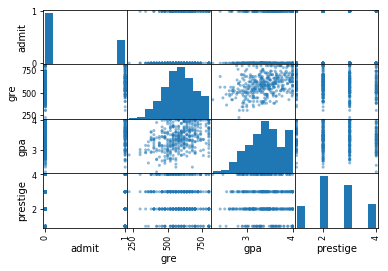

In [130]:
from pandas.plotting import scatter_matrix
scatter_matrix(df)
plt.show()


In [140]:
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


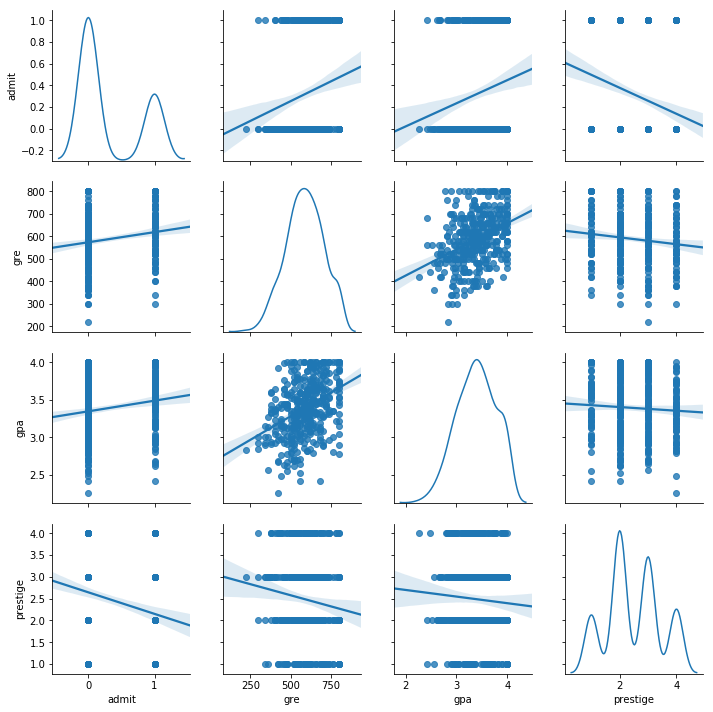

In [154]:
sns.pairplot(df, kind='reg', diag_kind = 'kde');

In [171]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
plt.scatter(df[(admit,gre),  color='black')
plt.plot(df, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())

plt.show()

SyntaxError: invalid syntax (<ipython-input-171-727f12c24429>, line 3)

#### Question 12. What did you find?

Answer: There appears to be colinearity between GRE and GPA

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: Isolate grad school admission rate and prestige, analyse outcomes through a pairplot and correlation functions.

#### Question 14. What is your hypothesis? 

Answer: Grad school admissions rates are related to the prestige of undergraduate schools. 

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

In [ ]:
#done above in output 127

#### 3. Advanced: Impute missing data